In [1]:
import pandas as pd
import os

def load_accuracies_from_directories(model):
    
    results = []
    for filename in os.listdir(os.path.join("results", model)):

        if filename.endswith('.csv'):

            parts = filename.replace('.csv', '').split('_')
            if parts[0] == 'base':
                    type_ = 'base'
                    complexity = parts[1]
                    instantiation = 'no_overlap' if parts[2] == 'no' else parts[2]
            else:
                type_ = 'disconnected'
                if parts[1] == 'more':
                    complexity = 'more_complex'
                    offset = 3
                else:
                    complexity = parts[1]
                    offset = 2
                if parts[offset] == 'control':
                    instantiation = 'control'
                else:
                    instantiation = '_'.join(parts[offset:-1])
            
            ground = parts[-1] == 'ground'
            if ground:
                continue

            acc = float(pd.read_csv(os.path.join("results", model, filename), usecols = ["accuracy"])["accuracy"][0])
            results.append({'problem_type': type_, 'complexity': complexity, 'instantiation': instantiation, 'accuracy': acc, 'model': model})
                
    dataframe = pd.DataFrame(results)
    return dataframe


In [2]:
df = load_accuracies_from_directories("Meta-Llama-3.1-8B-Instruct")
df.sort_values(by='accuracy', ascending=False)

,problem_type,complexity,instantiation,accuracy,model
9,disconnected,simple,no_overlap,0.664,Meta-Llama-3.1-8B-Instruct
8,base,simple,no_overlap,0.650,Meta-Llama-3.1-8B-Instruct
7,disconnected,complex,no_overlap,0.640,Meta-Llama-3.1-8B-Instruct
14,disconnected,complex,entity_overlap,0.640,Meta-Llama-3.1-8B-Instruct
5,disconnected,simple,entity_overlap,0.630,Meta-Llama-3.1-8B-Instruct
3,disconnected,complex,control,0.586,Meta-Llama-3.1-8B-Instruct
4,disconnected,simple,agent_overlap,0.586,Meta-Llama-3.1-8B-Instruct
2,disconnected,more_complex,no_overlap,0.552,Meta-Llama-3.1-8B-Instruct
13,disconnected,simple,control,0.540,Meta-Llama-3.1-8B-Instruct
12,disconnected,more_complex,control,0.524,Meta-Llama-3.1-8B-Instruct


In [3]:
df.sort_values(by=['complexity', 'accuracy'], ascending=[True, False])

,problem_type,complexity,instantiation,accuracy,model
7,disconnected,complex,no_overlap,0.640,Meta-Llama-3.1-8B-Instruct
14,disconnected,complex,entity_overlap,0.640,Meta-Llama-3.1-8B-Instruct
3,disconnected,complex,control,0.586,Meta-Llama-3.1-8B-Instruct
15,disconnected,complex,agent_overlap,0.418,Meta-Llama-3.1-8B-Instruct
6,disconnected,complex,agent_entity_overlap,0.406,Meta-Llama-3.1-8B-Instruct
2,disconnected,more_complex,no_overlap,0.552,Meta-Llama-3.1-8B-Instruct
12,disconnected,more_complex,control,0.524,Meta-Llama-3.1-8B-Instruct
1,disconnected,more_complex,entity_overlap,0.488,Meta-Llama-3.1-8B-Instruct
0,disconnected,more_complex,agent_overlap,0.340,Meta-Llama-3.1-8B-Instruct
11,disconnected,more_complex,agent_entity_overlap,0.262,Meta-Llama-3.1-8B-Instruct


In [4]:
df_no_control = df[df['instantiation'] != 'control']
mean_accuracy_by_complexity = df_no_control.groupby('complexity')['accuracy'].mean().reset_index()
complexity_order = ['simple', 'complex', 'more_complex']
mean_accuracy_by_complexity['complexity'] = pd.Categorical(
    mean_accuracy_by_complexity['complexity'],
    categories=complexity_order,
    ordered=True
)
mean_accuracy_by_complexity = mean_accuracy_by_complexity.sort_values('complexity')
mean_accuracy_by_complexity

,complexity,accuracy
2,simple,0.6076
0,complex,0.5260
1,more_complex,0.4105


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

df1 = load_accuracies_from_directories("Meta-Llama-3.1-8B-Instruct")
df2 = load_accuracies_from_directories("Qwen2.5-Math-7B-Instruct")
df3 = load_accuracies_from_directories("qwq-32b")
df4 = load_accuracies_from_directories("deepseek-r1")

df = pd.concat([df1, df2, df3, df4])
df = df[df["problem_type"] == "disconnected"]
df = df[df["instantiation"] != "control"]

model_map = {
    "Meta-Llama-3.1-8B-Instruct": "Meta-Llama-3.1-8B-Instruct",
    "Qwen2.5-Math-7B-Instruct": "Qwen2.5-Math-7B-Instruct",
    "qwq-32b": "QwQ-32B",
    "deepseek-r1": "DeepSeek-R1"
}
df["model"] = df["model"].map(model_map)

complexity_map = {
    "simple": "w/ Axiom",
    "complex": "w/ Tree",
    "more_complex": "w/ Multiple Trees"
}
df["complexity"] = df["complexity"].map(complexity_map)

overlap_map = {
    "no_overlap": "no overlap",
    "entity_overlap": "entity overlap",
    "agent_overlap": "agent overlap",
    "agent_entity_overlap": "agent and entity overlap"
}
df["instantiation"] = df["instantiation"].map(overlap_map)

In [28]:
from math import sqrt

def wilson_ci_cc(successes, n):
    # wilson 95% confidence interval with continuity correction
    if n == 0:
        return (0.0, 0.0)

    z = 1.96  # 95% confidence
    phat = successes / n
    cc = 1 / (2 * n)

    def lower_bound():
        if successes == 0:
            return 0.0
        num = phat + z**2/(2*n) - (z * sqrt((phat*(1 - phat) + z**2/(4*n)) / n) + cc)
        den = 1 + z**2 / n
        return max(0.0, num / den)

    def upper_bound():
        if successes == n:
            return 1.0
        num = phat + z**2/(2*n) + (z * sqrt((phat*(1 - phat) + z**2/(4*n)) / n) + cc)
        den = 1 + z**2 / n
        return min(1.0, num / den)

    return lower_bound(), upper_bound()

df["ci_lower"] = df["accuracy"].apply(lambda acc: wilson_ci_cc(acc*500, 500)[0])
df["ci_upper"] = df["accuracy"].apply(lambda acc: wilson_ci_cc(acc*500, 500)[1])

In [29]:
plt.rcParams.update({
    "font.family": "STIXGeneral",     # serif font similar to Times New Roman
    "mathtext.fontset": "stix",
    "axes.unicode_minus": False,
})

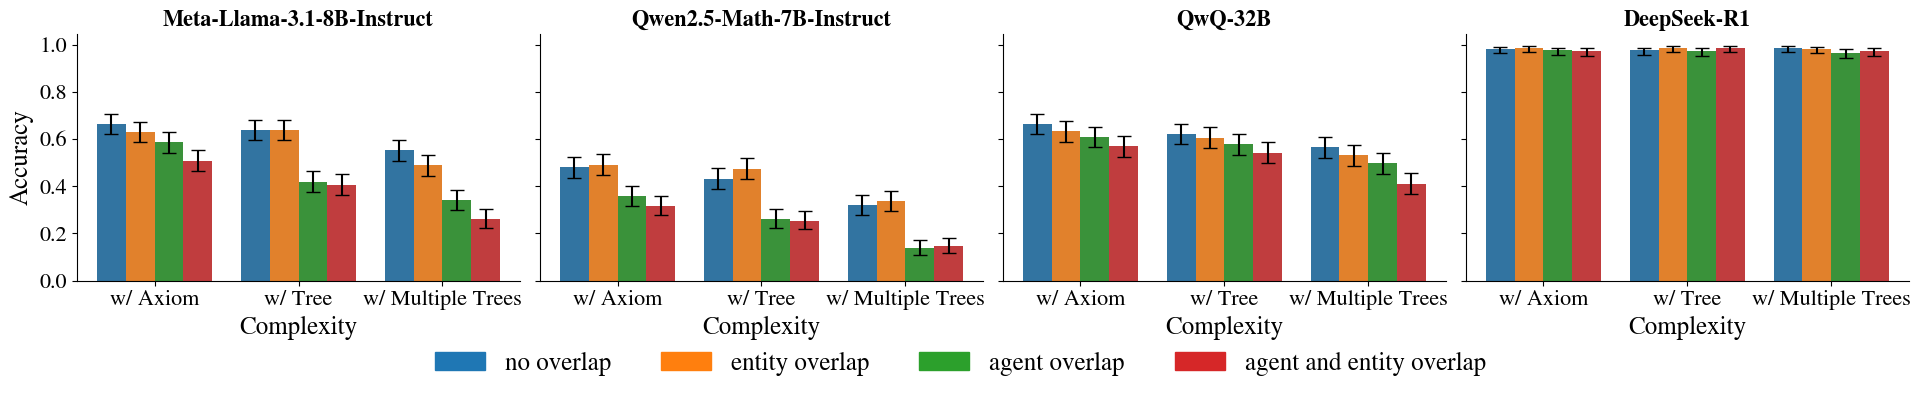

In [30]:
base_font_size = 18
overlap_order = ["no overlap", "entity overlap", "agent overlap", "agent and entity overlap"]
complexity_order = ["w/ Axiom", "w/ Tree", "w/ Multiple Trees"]

g = sns.catplot(
    data=df,
    kind="bar",
    x="complexity",
    y="accuracy",
    hue="instantiation",
    hue_order=overlap_order,
    order=complexity_order,
    col="model",
    height=4,
    aspect=1.2,
    errorbar=None  # disable Seaborn's default error bars in favor of wilson
)

for ax, model_name in zip(g.axes.flat, g.col_names):
    subdf = df[df["model"] == model_name]
    n_hues = len(overlap_order)
    total_width = 0.8
    width = total_width / n_hues

    for i, complexity in enumerate(complexity_order):
        for j, instantiation in enumerate(overlap_order):
            row = subdf[(subdf["complexity"] == complexity) & (subdf["instantiation"] == instantiation)]
            if not row.empty:
                y = row["accuracy"].values[0]
                yerr = [[y - row["ci_lower"].values[0]], [row["ci_upper"].values[0] - y]]
                x_pos = i - total_width/2 + j*width + width/2
                ax.errorbar(x=x_pos, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=5)


g.set_xticklabels(fontsize=base_font_size-2)
g.set_axis_labels("Complexity", "Accuracy", fontsize=base_font_size)
g.set_titles("{col_name}", fontweight='bold', size=base_font_size - 2)
for ax in g.axes.flat:
    plt.setp(ax.get_yticklabels(), fontsize=base_font_size-2)

g._legend.remove()
g.figure.subplots_adjust(bottom=0.30)

palette = sns.color_palette(n_colors=len(overlap_order))
handles = [plt.Rectangle((0,0),1,1,color=palette[i]) for i in range(len(overlap_order))]

g.figure.legend(
    handles=handles,
    labels=overlap_order,
    loc='lower center',
    ncol=len(overlap_order),
    frameon=False,
    fontsize=base_font_size,
)

plt.show()
g.savefig("figures/overlap_comparison.pdf", dpi=500, bbox_inches='tight')
